In [1]:
#import libraries

import random
import bisect
import numpy as np# Define input features:
from numpy import random
from IPython.display import clear_output

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt




# variable inputs
SEED = None
MAXSEEDSEQ = 1000
u1count = 0
counter = 0

# *** OUTPUT: customer_times[] contains customer arrival times tuple (customer #, arrival time (hr))

## code below

random.seed(SEED)
U1 = [random.uniform(0,1) for i in range(100000)] # contains sequence of random #s U(0,1)
poisson1rate = [0] # stores uniform poisson arrival rates lambda == 1


#define inverse transform functions here

def eq1(x): return (x/0.258)
def eq2(x): return (x+4.37)/1.13
def eq3(x): return ((x+.65)/.72)
def eq4(x): return ((x+18)/1.8)
def eq5(x): return ((x+3.84)/1.1)
def eq6(x): return ((x+12)/1.46)

vhrthin = pd.read_csv("thinningdata.csv")


for i in range(24):
    test = poisson1rate[i] - np.log(U1[counter])
    while test >= 20.25 and eq6(test) >= 21.73 or test >= 24: # trim domain/range [0,24) of poisson generated value
        counter += 1
        test = poisson1rate[i] - np.log(U1[counter])  
        
    poisson1rate.append(test)
    counter += 1

poisson1rate.pop(0) # in place
    


#cdf inv equations

'''
eq1: y=0.258x inv_range: (0,1.29)

eq2: y=1.13x - 4.37 range: 1.29-5.82

eq3: y=0.72x - 0.65 range: 5.82-10.85

eq4: y=1.8x - 18 range: 10.85-18.06

eq5: y= 1.1x - 3.84 range: 18.06 - 20.25

eq6: y=1.46x - 12, range: 20.25-24'''


flist = [0,eq1,eq2,eq3,eq4,eq5,eq6]

# define right sets inverse domain = f(x) range
places = [
    (1.29, '1'),
    (5.82, '2'),
    (10.85, '3'),
    (18.06, '4'),
    (20.25, '5'),
    (24, '6')
]

places.sort() # list must be sorted
pos_log = []

for to_find in poisson1rate:
    pos = bisect.bisect_right(places, (to_find,))
    pos_log.append(pos)
  #  print ('%s -> %s' % (to_find, places[pos]))

times_list = [(poisson1rate[x],places[pos_log[x]]) for x in range(len(pos_log))]

customer = 1
customer_times = []

for x in range(len(times_list)):
    arrtime = flist[int(times_list[x][1][1])](times_list[x][0])
    customer_times.append((customer, arrtime))
    customer += 1

In [4]:
customer_times ##print customer times (hrs ie 18.60 == 6:36PM)

[(1, 0.12756889069609167),
 (2, 0.6056790799371888),
 (3, 3.246863819156638),
 (4, 5.205387029779107),
 (5, 6.592914315606257),
 (6, 7.368194076115311),
 (7, 10.469193614859233),
 (8, 11.46320609940882),
 (9, 13.582329803343335),
 (10, 13.874555157200856),
 (11, 15.276866934916576),
 (12, 15.355236328737933),
 (13, 16.536771110092143),
 (14, 17.04402634222219),
 (15, 17.132331996276548),
 (16, 17.37629168314294),
 (17, 17.43419440339448),
 (18, 17.489033246912946),
 (19, 17.533308632784664),
 (20, 17.693009747596154),
 (21, 18.031260056695434),
 (22, 18.10666556678218),
 (23, 18.609780521500756),
 (24, 19.18360248796166)]

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Integrated linear function poisson constant arrival rates $\\lambda$(t)')

Text(0.5, 0, 'Hour in Day (t)')

Text(0, 0.5, 'Integral of Poisson arrival rate(t)')

([<matplotlib.axis.XTick at 0x7f4d6b366f10>,
 <a list of 24 Text major ticklabel objects>)

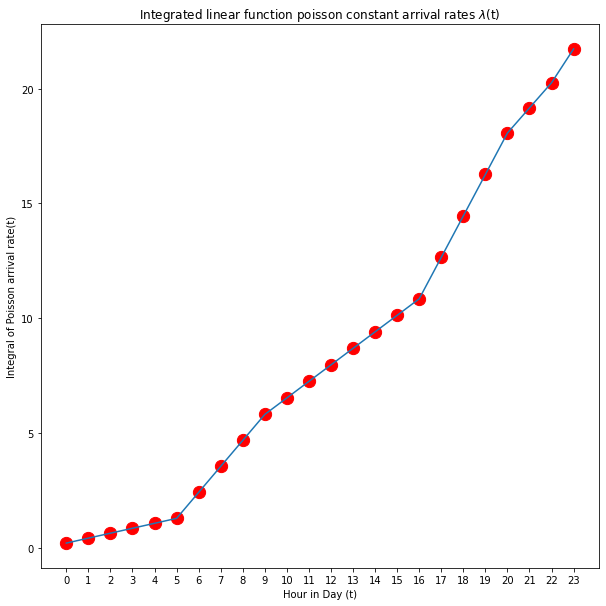

In [5]:
## Graph integral of poisson arrival non-stationary function lamda(t) wrt time t

plt.figure(figsize=(10,10))
plt.plot(vhrthin.index, vhrthin.vcumsum)
plt.title(r'Integrated linear function poisson constant arrival rates $\lambda$(t)')
plt.xlabel('Hour in Day (t)')
plt.ylabel(r'Integral of Poisson arrival rate(t)')
plt.xticks(np.arange(24))
plt.scatter(vhrthin.index,vhrthin.vcumsum,s=150,color='r', zorder=2)
